# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.shape

(1338, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [15]:
# Apply LabelEncoder to categorical columns
df['sex'] = label_encoder.fit_transform(df['sex'])  # female -> 0, male -> 1
df['smoker'] = label_encoder.fit_transform(df['smoker'])  # smoker yes -> 1, no -> 0

In [16]:
df.head(10)

#female -> 0, #male -> 1
#smoker yes-> 1 , no->0

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


# EDA and Visualizations

In [18]:
# Now, for visualization, convert the numeric values back to strings:
df_viz = df.copy()

df_viz['sex'] = df_viz['sex'].replace({0: 'female', 1: 'male'})
df_viz['smoker'] = df_viz['smoker'].replace({0: 'non-smoker', 1: 'smoker'})
df_viz['children'] = df_viz['children'].astype(str)  # Convert 'children' to string for visualization

<Axes: >

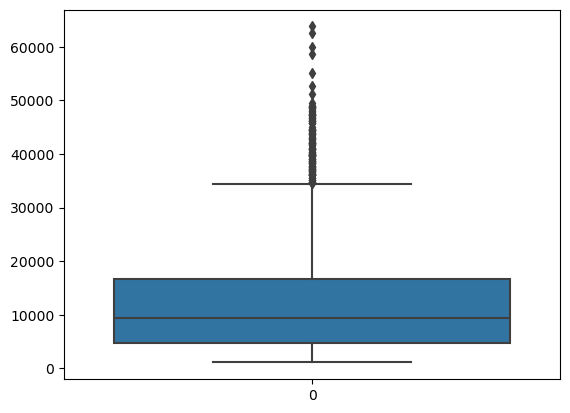

In [19]:
sns.boxplot(df['charges'])

In [20]:
df['charges'].median()

9382.033

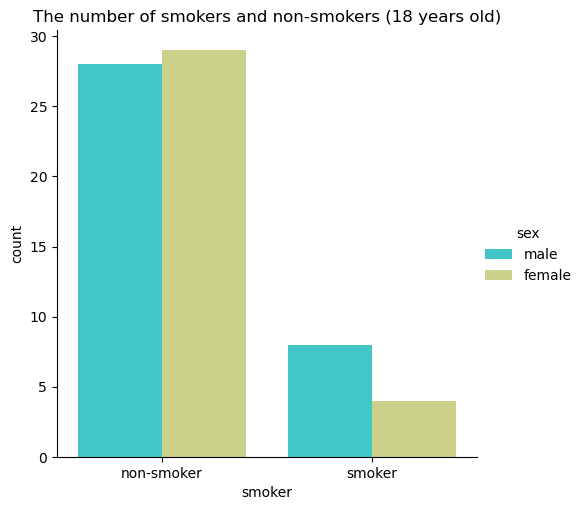

In [21]:
sns.catplot(x="smoker", kind="count", hue='sex', palette="rainbow", data=df_viz[df_viz['age'] == 18])
plt.title("The number of smokers and non-smokers (18 years old)")
plt.show()

### Oh. I was hoping the result would be different. 18 years old - a very young age. Does smoking affect the cost of treatment at this age?

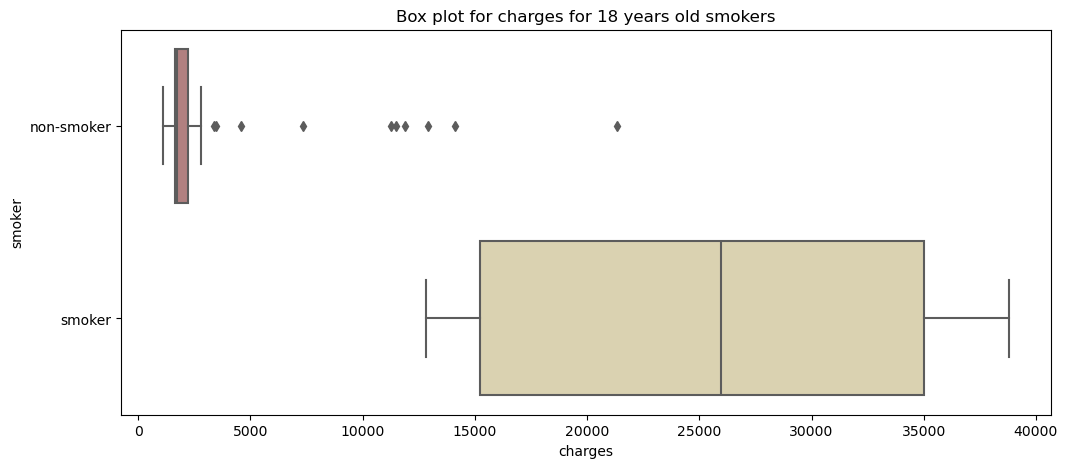

In [23]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges for 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data=df_viz[df_viz['age'] == 18], orient="h", palette="pink")
plt.show()

### Oh. As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents. Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

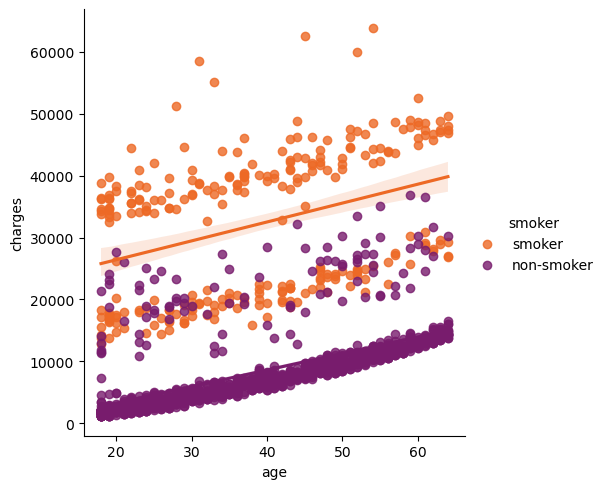

In [25]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df_viz, palette="inferno_r")
plt.show()

### In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends! In smoking people, we do not see such dependence. I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs. But we work with what we have! Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?

C:\Users\Vivek.Nakka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

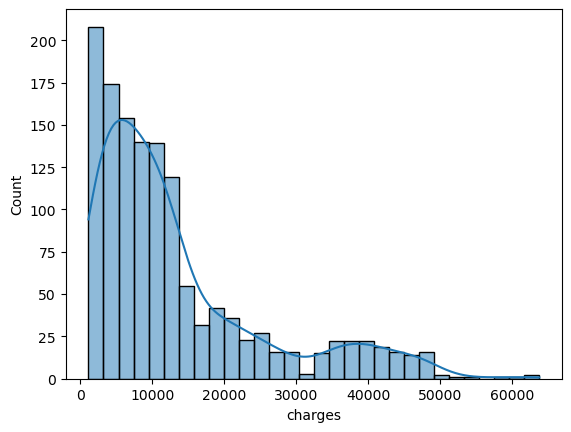

In [27]:
sns.histplot(data=df_viz, x='charges', kde=True)

C:\Users\Vivek.Nakka\AppData\Local\Temp\ipykernel_19228\3697456241.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')
C:\Users\Vivek.Nakka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Charges')

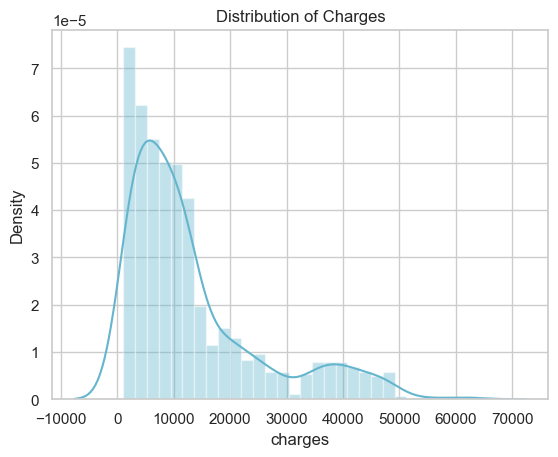

In [28]:
sns.set(style='whitegrid')
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

##### This distribution is right-skewed. To make it closer to normal we can apply natural log


C:\Users\Vivek.Nakka\AppData\Local\Temp\ipykernel_19228\782112099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )
C:\Users\Vivek.Nakka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


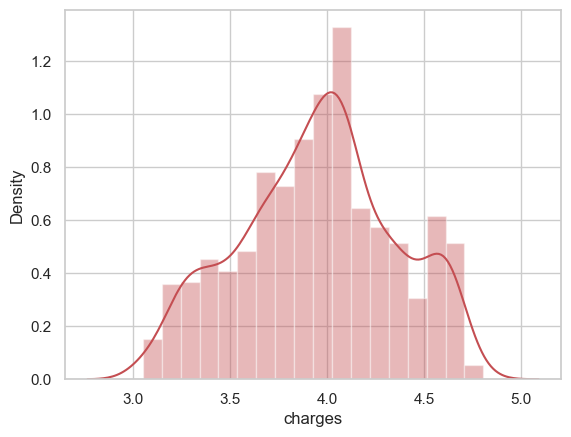

In [31]:
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

##### Now let's look at the charges by region

0 -> NE
1 -> NW
2 -> SE
3 -> SW

In [34]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges = charges.head()

<Axes: xlabel='region', ylabel='charges'>

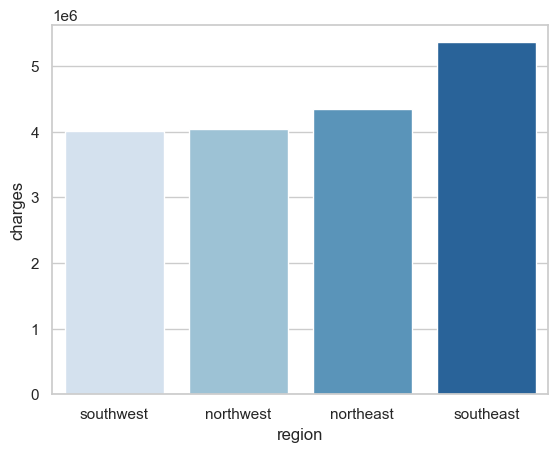

In [35]:
sns.barplot(x=charges.index, y=charges, palette='Blues')

##### So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region


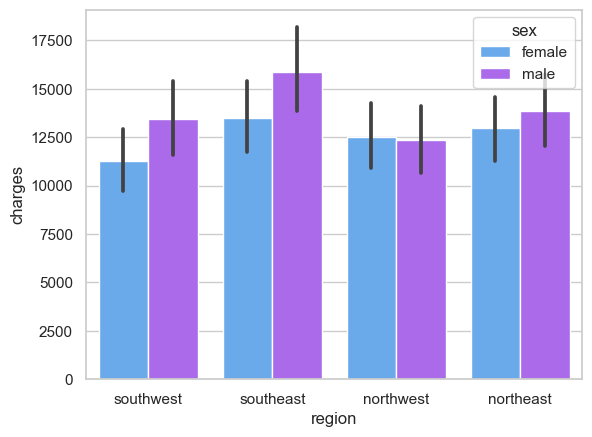

In [37]:
ax = sns.barplot(x='region', y='charges', hue='sex', data=df_viz, palette='cool')

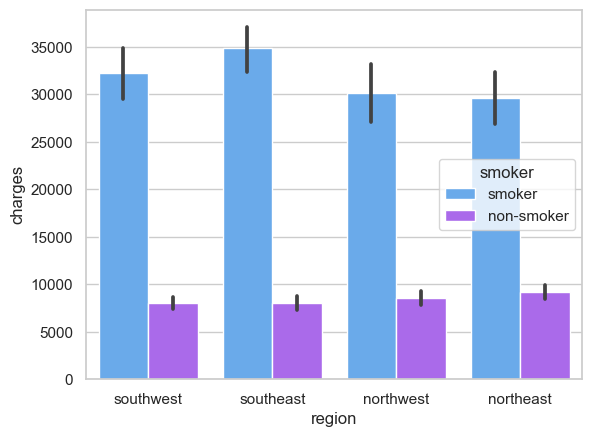

In [38]:
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df_viz, palette='cool')

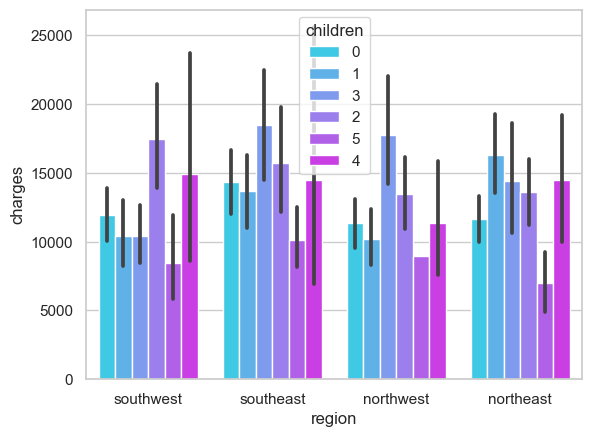

In [39]:
# Ensure 'children' is treated as a categorical variable by converting to string
df['children'] = df['children'].astype(str)

# Now the plotting should work fine
ax = sns.barplot(x='region', y='charges', hue='children', data=df_viz, palette='cool')
plt.show()

In [40]:
df['region']= label_encoder.fit_transform(df['region']) 

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


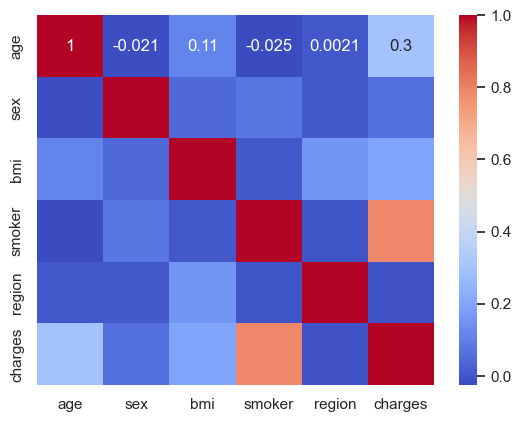

In [42]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Generate the heatmap for the numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Compare Between Models

In [44]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

    


Training Model LR 
-----------------------------------------------
Score is 0.7833463107364538
Training R-squared: 0.7417049283233981
Testing R-squared: 0.7833463107364538
Mean Squared Error: 33635210.43117841
Mean Absolute Error: 4186.508898366434
Training Model RF 
-----------------------------------------------
Score is 0.876777302999384
Training R-squared: 0.9278460509216631
Testing R-squared: 0.876777302999384
Mean Squared Error: 19130167.400340803
Mean Absolute Error: 2428.1995550012434
Training Model DT 
-----------------------------------------------
Score is 0.743258567476343
Training R-squared: 0.9983078124756305
Testing R-squared: 0.743258567476343
Mean Squared Error: 39858781.72067851
Mean Absolute Error: 2898.68815566791
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.8419072268070207
Training R-squared: 0.9927812965590004
Testing R-squared: 0.8419072268070207
Mean Squared Error: 24543702.496226683
Mean Absolute Error: 2609.51407

### The best is RandomForestRegressor

# Now We Go To Choose Max Depth

In [48]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values =[]
for max_depth_val in max_depth_values:
    model = RandomForestRegressor(max_depth=max_depth_val,random_state = 2)
    model.fit(x_train, y_train)
    y_pred =model.predict(x_train)
    acc_train=model.score(x_test,y_test) 
    train_accuracy_values.append(acc_train)

In [49]:
train_accuracy_values

[0.6608048922770777,
 0.8417933495550463,
 0.8675746825596274,
 0.872677170478934,
 0.8753239247794342,
 0.8755309603734038,
 0.8729311378096285,
 0.8711685231482463]

In [50]:
final_model = RandomForestRegressor(max_depth=6,random_state = 0)
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

# Model Evalulation

In [52]:
forest_train_pred = final_model.predict(x_train)
forest_test_pred = final_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 13740918.931, MSE test data: 19845744.977
R2 train data: 0.905, R2 test data: 0.872


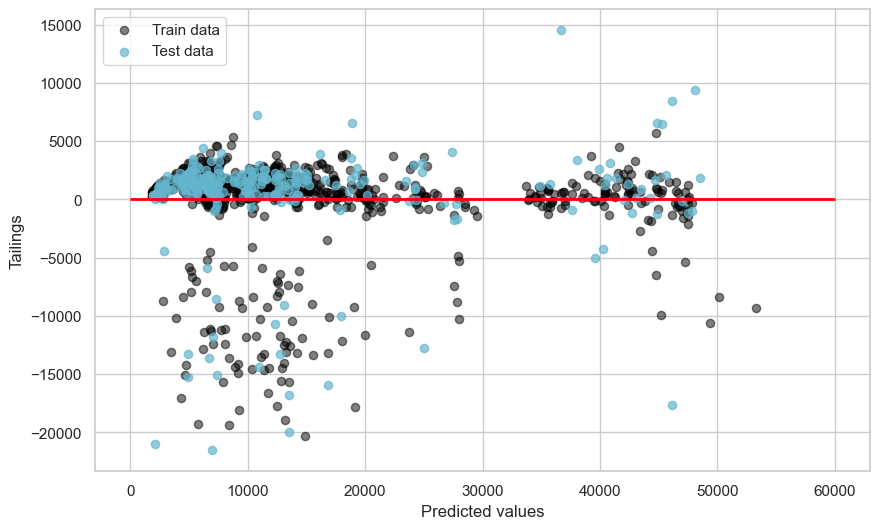

In [53]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

### Linear Regression (LR) – This is a simple baseline model that assumes a linear relationship between the features and the target.
### Random Forest Regressor (RF) – This is an ensemble model that fits multiple decision trees and averages their predictions.
### Decision Tree Regressor (DT) – A single decision tree model, which may be prone to overfitting but useful for understanding splits in data.
### Gradient Boosting Regressor (GBR) – Another ensemble method that builds trees sequentially, correcting errors from the previous trees.
### K-Neighbors Regressor (KNN) – A non-parametric method that uses the K nearest data points to make predictions.
### Support Vector Regressor (SVR) – Uses support vectors and a kernel trick to fit complex, non-linear relationships.